<a href="https://colab.research.google.com/github/EdaAnda/NYC/blob/main/NYC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !cp /content/drive/MyDrive/VeriAnalizi/Airbnb_NYC_2019.csv -r /content

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Yeni Bölüm

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

In [72]:
df = pd.read_csv("Airbnb_NYC_2019.csv", delimiter=",", encoding="UTF-8", on_bad_lines=False)

df.head()

ValueError: ignored

In [ ]:
df.shape

(49072, 16)

In [ ]:
df.size

785152

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365;;;;;'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49072 entries, 0 to 49071
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              49072 non-null  object 
 1   name                            41559 non-null  object 
 2   host_id                         41559 non-null  object 
 3   host_name                       41542 non-null  object 
 4   neighbourhood_group             41559 non-null  object 
 5   neighbourhood                   41559 non-null  object 
 6   latitude                        41559 non-null  float64
 7   longitude                       41559 non-null  object 
 8   room_type                       41559 non-null  object 
 9   price                           41559 non-null  float64
 10  minimum_nights                  41559 non-null  float64
 11  number_of_reviews               41559 non-null  object 
 12  last_review                     

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,41559.0,40.701769,1.778814,-73.96007,40.6905,40.72347,40.76331,40.91306
price,41559.0,153.792127,243.512214,0.00000,69.0000,109.00000,178.00000,10000.00000
minimum_nights,41559.0,6.938425,20.383375,1.00000,1.0000,2.00000,5.00000,1250.00000
reviews_per_month,32912.0,1.374359,1.686133,0.01000,0.1900,0.72000,2.03000,58.50000


In [ ]:
df.drop(["name", "id", "host_id", "host_name"], inplace=True, axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365;;;;;
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9,2018-10-19,0.21,6,365;;;;;
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45,2019-05-21,0.38,2,355;;;;;
2,Manhattan,Harlem,40.80902,-73.9419,Private room,150.0,3.0,0,NaN,NaN,1,365;;;;;
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270,2019-07-05,4.64,1,194;;;;;
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9,2018-11-19,0.10,1,0;;;;;


In [ ]:
integers = ["minimum_nights","number_of_reviews", "calculated_host_listings_count"]

for column in integers:
  df[column] = pd.to_numeric(df[column], errors="coerce")

  max_value = (3*df[column].std()) + df[column].mean()  # finds the max value that is not going to be called not an outlier
  min_value = -((3*df[column].std()) + df[column].mean())  # finds the min value that is not going to be called not an outlier

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()  # calculate the new mean of the column without the outlier values

  # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
  if mean is not np.nan:
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean  # change outlier values with mean
    df[column].fillna(mean, inplace=True)  # also fill nan values with mean
  else:  # this condition means there is no outlier value in the column
    df[column].fillna(df[column].mean(), inplace=True)  # just fill nan values with mean

  df[column] = df[column].astype("int64")  # the type will be converted to int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49072 entries, 0 to 49071
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             41559 non-null  object 
 1   neighbourhood                   41559 non-null  object 
 2   latitude                        41559 non-null  float64
 3   longitude                       41559 non-null  object 
 4   room_type                       41559 non-null  object 
 5   price                           41559 non-null  float64
 6   minimum_nights                  49072 non-null  int64  
 7   number_of_reviews               49072 non-null  int64  
 8   last_review                     32912 non-null  object 
 9   reviews_per_month               32912 non-null  float64
 10  calculated_host_listings_count  49072 non-null  int64  
 11  availability_365;;;;;           41549 non-null  object 
dtypes: float64(3), int64(3), object(

<Axes: xlabel='price', ylabel='Count'>

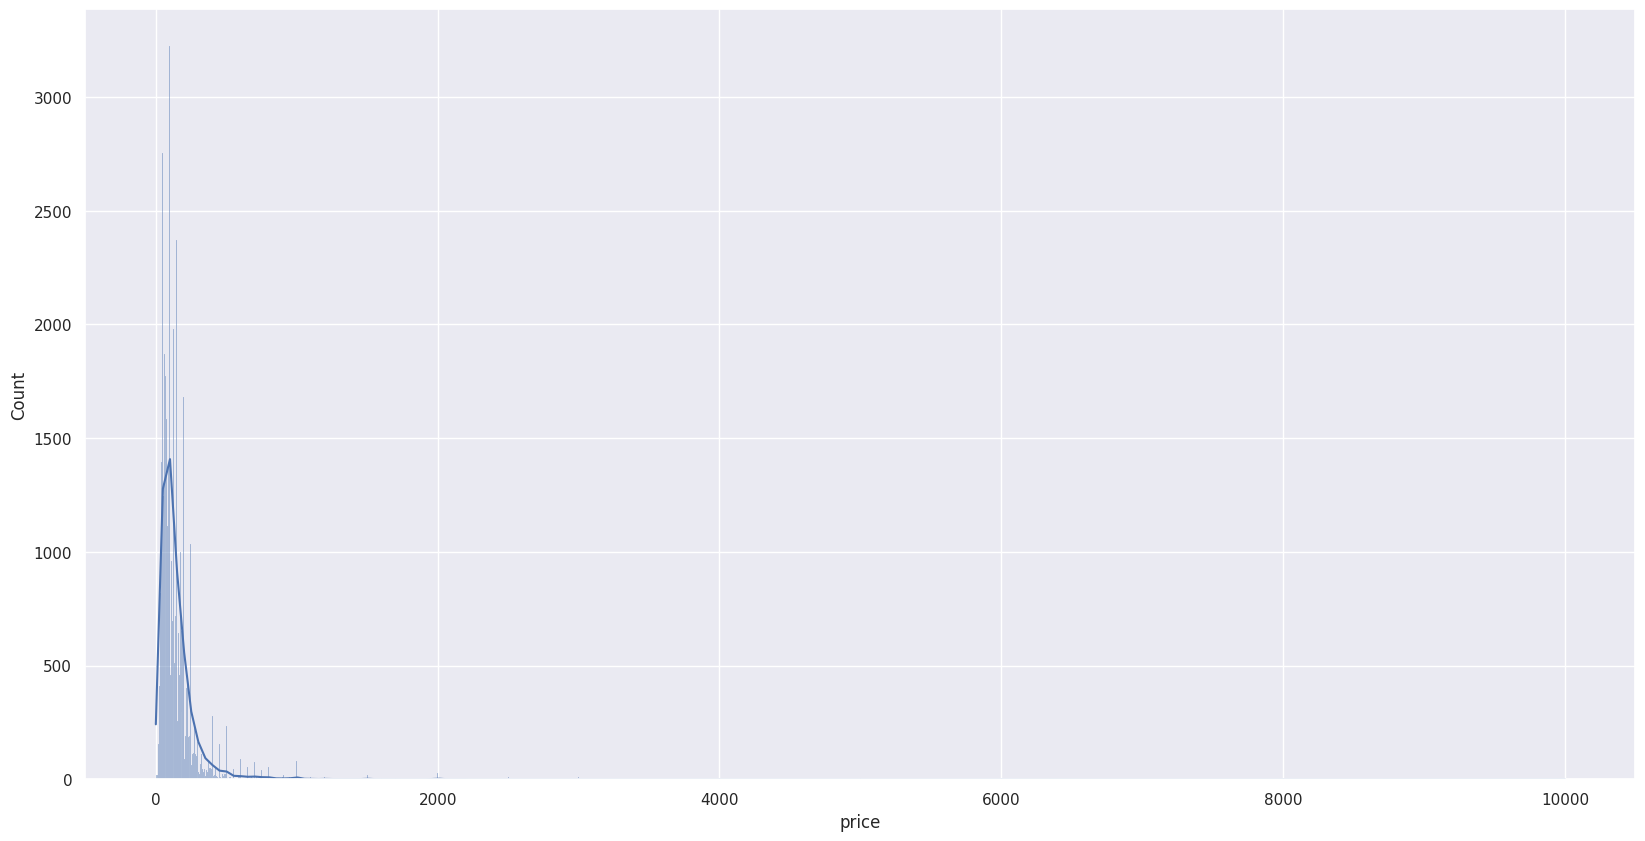

In [ ]:
sns.histplot(df["price"], kde=True)

In [ ]:
floats = ["price", "reviews_per_month", "calculated_host_listings_count", "latitude", "longitude"]

for column in floats:
  df[column] = pd.to_numeric(df[column], errors="coerce")

  max_value = (3*df[column].std()) + df[column].mean()  # finds the max value that is not going to be called not an outlier
  min_value = -((3*df[column].std()) + df[column].mean())  # finds the min value that is not going to be called not an outlier

  mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()  # calculate the new mean of the column without the outlier values

  # if there is no outlier value then the mean will be np.nan in this situation don't need to do imputation
  if mean is not np.nan:
    df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean  # change outlier values with mean
    df[column].fillna(mean, inplace=True)  # also fill nan values with mean
  else:  # this condition means there is no outlier value in the column
    df[column].fillna(df[column].mean(), inplace=True)  # filling NA values with mean

  df[column] = df[column].astype("float64") #converting the type to int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49072 entries, 0 to 49071
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             41559 non-null  object 
 1   neighbourhood                   41559 non-null  object 
 2   latitude                        49072 non-null  float64
 3   longitude                       49072 non-null  float64
 4   room_type                       41559 non-null  object 
 5   price                           49072 non-null  float64
 6   minimum_nights                  49072 non-null  int64  
 7   number_of_reviews               49072 non-null  int64  
 8   last_review                     32912 non-null  object 
 9   reviews_per_month               49072 non-null  float64
 10  calculated_host_listings_count  49072 non-null  float64
 11  availability_365;;;;;           41549 non-null  object 
dtypes: float64(5), int64(2), object(

<Axes: xlabel='price', ylabel='Count'>

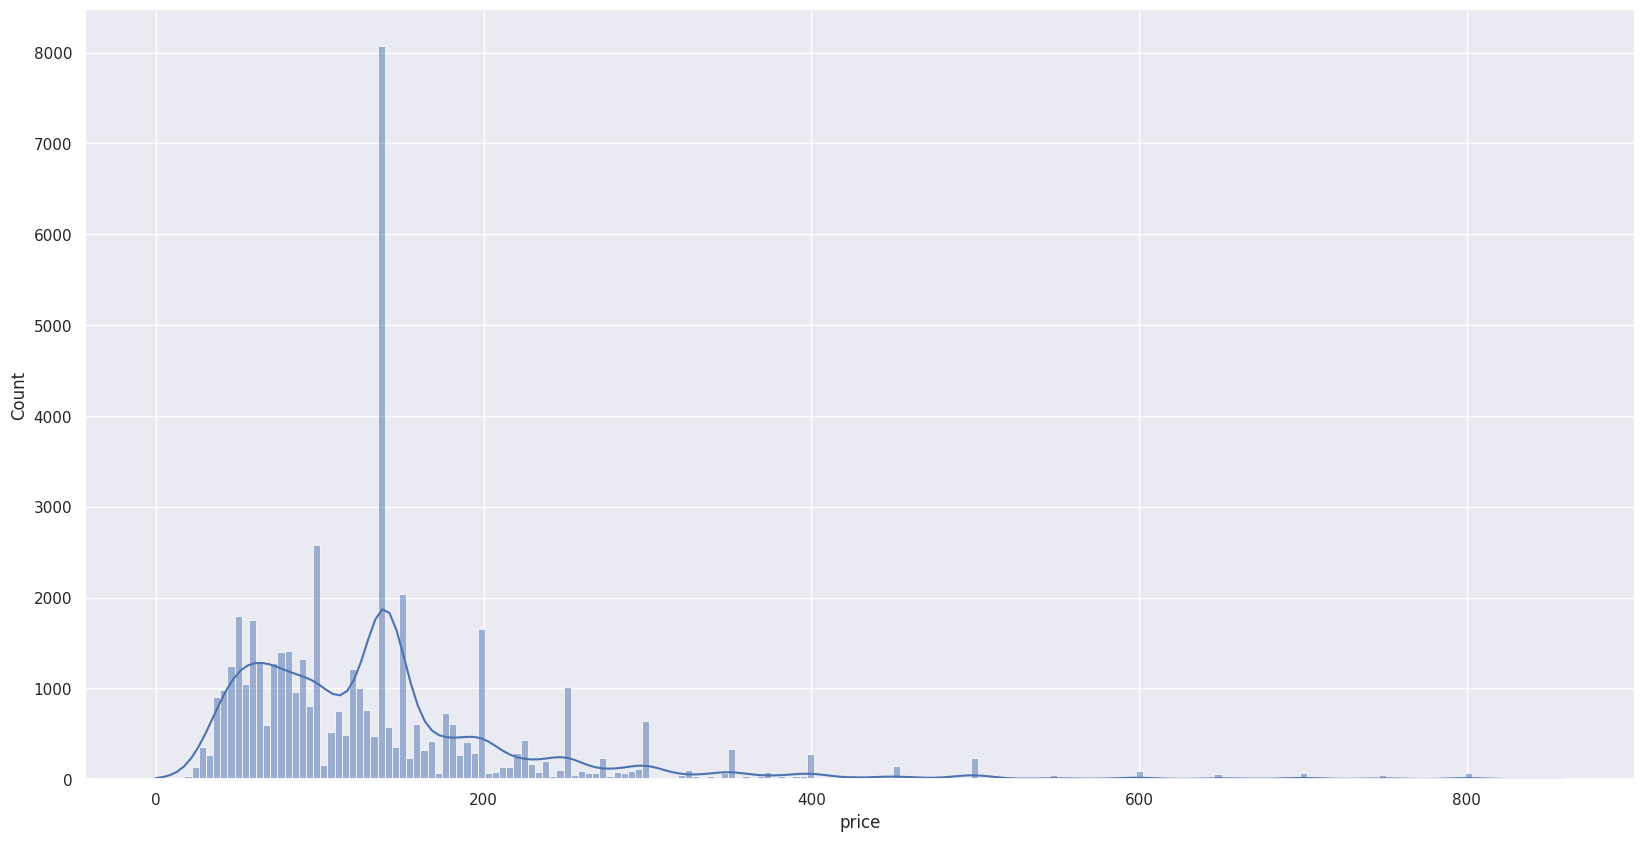

In [ ]:
sns.histplot(df["price"], kde=True)

In [ ]:
df.groupby("room_type")["room_type"].value_counts()

room_type        room_type      
100              100                    1
115              115                    1
159              159                    1
175              175                    1
180              180                    1
46               46                     1
50               50                     1
58               58                     1
80               80                     1
95               95                     1
Entire home/apt  Entire home/apt    21540
Private room     Private room       18990
Shared room      Shared room         1019
Name: room_type, dtype: int64

In [ ]:
for key, value in df.groupby(by="room_type")["room_type"].value_counts().items():
  if value==1:
    df.loc[df["room_type"]==key[0], "room_type"] = "unknown_type"

df.groupby(by="room_type")["room_type"].value_counts()

room_type        room_type      
Entire home/apt  Entire home/apt    21540
Private room     Private room       18990
Shared room      Shared room         1019
unknown_type     unknown_type          10
Name: room_type, dtype: int64

In [ ]:
df.isna().sum()

neighbourhood_group                7513
neighbourhood                      7513
latitude                              0
longitude                             0
room_type                          7513
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       16160
reviews_per_month                     0
calculated_host_listings_count        0
availability_365;;;;;              7523
dtype: int64

In [ ]:
df.isna().sum()

neighbourhood_group                7513
neighbourhood                      7513
latitude                              0
longitude                             0
room_type                          7513
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       16160
reviews_per_month                     0
calculated_host_listings_count        0
availability_365;;;;;              7523
dtype: int64

In [ ]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365;;;;;
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.210000,1.650196,365;;;;;
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.380000,2.000000,355;;;;;
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,1.264343,1.000000,365;;;;;
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,18,2019-07-05,4.640000,1.000000,194;;;;;
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.100000,1.000000,0;;;;;


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49072 entries, 0 to 49071
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             41559 non-null  object 
 1   neighbourhood                   41559 non-null  object 
 2   latitude                        49072 non-null  float64
 3   longitude                       49072 non-null  float64
 4   room_type                       41559 non-null  object 
 5   price                           49072 non-null  float64
 6   minimum_nights                  49072 non-null  int64  
 7   number_of_reviews               49072 non-null  int64  
 8   last_review                     32912 non-null  object 
 9   reviews_per_month               49072 non-null  float64
 10  calculated_host_listings_count  49072 non-null  float64
 11  availability_365;;;;;           41549 non-null  object 
dtypes: float64(5), int64(2), object(

In [ ]:
object_columns = df.select_dtypes("object").columns
object_columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review',
       'availability_365;;;;;'],
      dtype='object')

In [ ]:
for column in object_columns:
  df[column] = df[column].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49072 entries, 0 to 49071
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             41559 non-null  category
 1   neighbourhood                   41559 non-null  category
 2   latitude                        49072 non-null  float64 
 3   longitude                       49072 non-null  float64 
 4   room_type                       41559 non-null  category
 5   price                           49072 non-null  float64 
 6   minimum_nights                  49072 non-null  int64   
 7   number_of_reviews               49072 non-null  int64   
 8   last_review                     32912 non-null  category
 9   reviews_per_month               49072 non-null  float64 
 10  calculated_host_listings_count  49072 non-null  float64 
 11  availability_365;;;;;           41549 non-null  category
dtypes: category(5), fl

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,49072.0,40.729352,0.050080,40.49979,40.69640,40.729352,40.757423,40.91306
longitude,49072.0,-73.952592,0.042231,-74.24442,-73.97939,-73.952592,-73.941198,-73.71690
price,49072.0,139.408394,99.503915,0.00000,75.00000,129.000000,155.000000,860.00000
minimum_nights,49072.0,3.119478,1.833019,1.00000,2.00000,3.000000,5.000000,12.00000
number_of_reviews,49072.0,10.928208,11.260074,0.00000,1.00000,9.000000,18.000000,54.00000
reviews_per_month,49072.0,1.264343,1.132107,0.01000,0.38000,1.264343,1.264343,6.43000
calculated_host_listings_count,49072.0,1.650196,0.892831,1.00000,1.00000,1.000000,2.000000,4.00000


In [ ]:
df.pivot_table(values=["number_of_reviews", "price"],
               columns="room_type",
               aggfunc=np.mean)

room_type,Entire home/apt,Private room,Shared room,unknown_type
number_of_reviews,9.685051,9.681885,8.223749,18.0
price,191.245055,84.585325,66.654204,5.9


In [ ]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365;;;;;
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.210000,1.650196,365;;;;;
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.380000,2.000000,355;;;;;
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,1.264343,1.000000,365;;;;;
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,18,2019-07-05,4.640000,1.000000,194;;;;;
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.100000,1.000000,0;;;;;


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49072 entries, 0 to 49071
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             41559 non-null  category
 1   neighbourhood                   41559 non-null  category
 2   latitude                        49072 non-null  float64 
 3   longitude                       49072 non-null  float64 
 4   room_type                       41559 non-null  category
 5   price                           49072 non-null  float64 
 6   minimum_nights                  49072 non-null  int64   
 7   number_of_reviews               49072 non-null  int64   
 8   last_review                     32912 non-null  category
 9   reviews_per_month               49072 non-null  float64 
 10  calculated_host_listings_count  49072 non-null  float64 
 11  availability_365;;;;;           41549 non-null  category
dtypes: category(5), fl

In [ ]:
df.to_csv("airbnb_nyc_preprocessed.csv")